<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.069129,78.174719,27.400940,0.000091,214.644879,214.645652,-0.000773
1,0.0,1.0,53.312214,74.952099,35.022132,0.000468,173.286913,173.286496,0.000417
2,0.0,2.0,81.674510,40.451468,29.521646,0.001993,161.649617,161.647942,0.001676
3,0.0,3.0,20.818450,39.056203,63.377947,0.000309,133.252909,133.251740,0.001168
4,0.0,4.0,46.107880,32.016939,30.866760,-0.002970,118.988608,118.991245,-0.002638
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.822045,50.827514,70.422992,0.001459,179.074011,179.073748,0.000263
59996,999.0,56.0,43.698648,38.759718,64.869692,0.002500,157.330559,157.329596,0.000962
59997,999.0,57.0,31.801516,36.762544,26.016037,-0.001252,104.578845,104.581176,-0.002331
59998,999.0,58.0,58.435829,61.689504,38.216245,-0.000972,168.340606,168.341667,-0.001061


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.069129  78.174719  27.400940  0.000091  214.644879   
      1.0    53.312214  74.952099  35.022132  0.000468  173.286913   
      2.0    81.674510  40.451468  29.521646  0.001993  161.649617   
      3.0    20.818450  39.056203  63.377947  0.000309  133.252909   
      4.0    46.107880  32.016939  30.866760 -0.002970  118.988608   
...                ...        ...        ...       ...         ...   
999.0 55.0   47.822045  50.827514  70.422992  0.001459  179.074011   
      56.0   43.698648  38.759718  64.869692  0.002500  157.330559   
      57.0   31.801516  36.762544  26.016037 -0.001252  104.578845   
      58.0   58.435829  61.689504  38.216245 -0.000972  168.340606   
      59.0   47.161312  24.987116  49.555723  0.003298  131.707449   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.645652 -0.000773  
      1.0    173.286496  0.000417  
      2.0    161.647942  0.001676  
      3.0    133.251740  0.001168  
      4.0    118.991245 -0.002638  
...                 ...       ...  
999.0 55.0   179.073748  0.000263  
      56.0   157.329596  0.000962  
      57.0   104.581176 -0.002331  
      58.0   168.341667 -0.001061  
      59.0   131.705779  0.001670  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.069129  78.174719  27.400940  0.000091  214.644879   
      1.0    53.312214  74.952099  35.022132  0.000468  173.286913   
      2.0    81.674510  40.451468  29.521646  0.001993  161.649617   
      3.0    20.818450  39.056203  63.377947  0.000309  133.252909   
      4.0    46.107880  32.016939  30.866760 -0.002970  118.988608   
...                ...        ...        ...       ...         ...   
999.0 55.0   47.822045  50.827514  70.422992  0.001459  179.074011   
      56.0   43.698648  38.759718  64.869692  0.002500  157.330559   
      57.0   31.801516  36.762544  26.016037 -0.001252  104.578845   
      58.0   58.435829  61.689504  38.216245 -0.000972  168.340606   
      59.0   47.161312  24.987116  49.555723  0.003298  131.707449   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.645652 -0.000773  
      1.0    173.286496  0.000417  
      2.0    161.647942  0.001676  
      3.0    133.251740  0.001168  
      4.0    118.991245 -0.002638  
...                 ...       ...  
999.0 55.0   179.073748  0.000263  
      56.0   157.329596  0.000962  
      57.0   104.581176 -0.002331  
      58.0   168.341667 -0.001061  
      59.0   131.705779  0.001670  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.069129,78.174719,27.400940,0.000091,214.644879,214.645652,-0.000773
1,0.0,1.0,53.312214,74.952099,35.022132,0.000468,173.286913,173.286496,0.000417
2,0.0,2.0,81.674510,40.451468,29.521646,0.001993,161.649617,161.647942,0.001676
3,0.0,3.0,20.818450,39.056203,63.377947,0.000309,133.252909,133.251740,0.001168
4,0.0,4.0,46.107880,32.016939,30.866760,-0.002970,118.988608,118.991245,-0.002638
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.822045,50.827514,70.422992,0.001459,179.074011,179.073748,0.000263
59996,999.0,56.0,43.698648,38.759718,64.869692,0.002500,157.330559,157.329596,0.000962
59997,999.0,57.0,31.801516,36.762544,26.016037,-0.001252,104.578845,104.581176,-0.002331
59998,999.0,58.0,58.435829,61.689504,38.216245,-0.000972,168.340606,168.341667,-0.001061


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.069129  78.174719  27.400940  0.000091  214.644879   
      1.0    53.312214  74.952099  35.022132  0.000468  173.286913   
      2.0    81.674510  40.451468  29.521646  0.001993  161.649617   
      3.0    20.818450  39.056203  63.377947  0.000309  133.252909   
      4.0    46.107880  32.016939  30.866760 -0.002970  118.988608   
...                ...        ...        ...       ...         ...   
999.0 55.0   47.822045  50.827514  70.422992  0.001459  179.074011   
      56.0   43.698648  38.759718  64.869692  0.002500  157.330559   
      57.0   31.801516  36.762544  26.016037 -0.001252  104.578845   
      58.0   58.435829  61.689504  38.216245 -0.000972  168.340606   
      59.0   47.161312  24.987116  49.555723  0.003298  131.707449   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.645652 -0.000773  
      1.0    173.286496  0.000417  
      2.0    161.647942  0.001676  
      3.0    133.251740  0.001168  
      4.0    118.991245 -0.002638  
...                 ...       ...  
999.0 55.0   179.073748  0.000263  
      56.0   157.329596  0.000962  
      57.0   104.581176 -0.002331  
      58.0   168.341667 -0.001061  
      59.0   131.705779  0.001670  

[60000 rows x 7 columns]

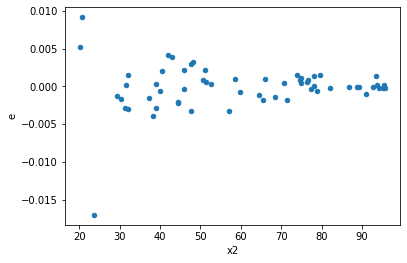

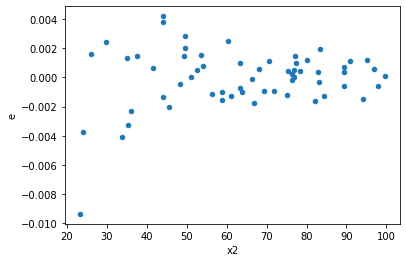

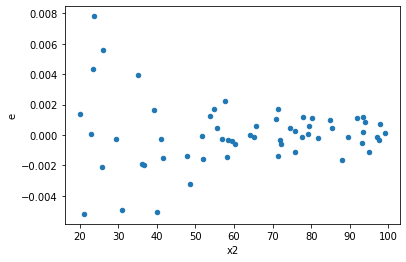

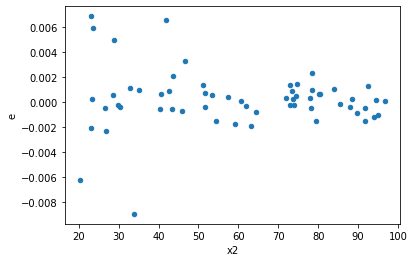

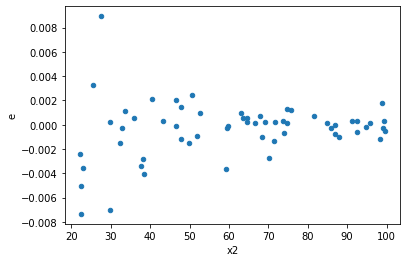

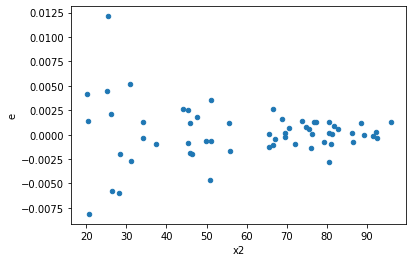

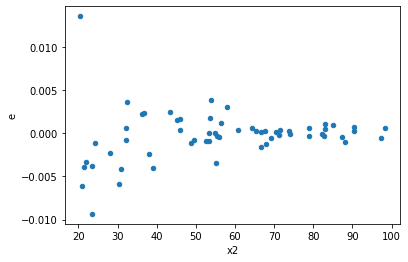

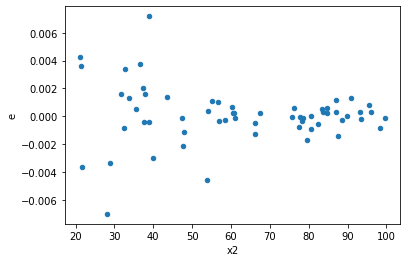

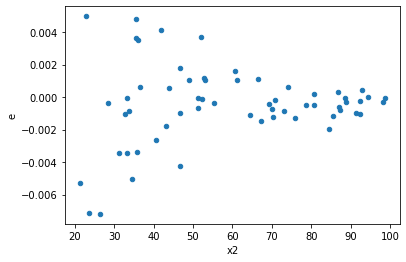

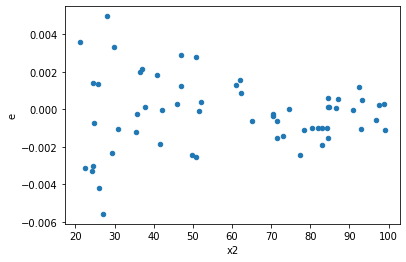

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,32.0,22.0,7.543827930818105e-05,0.0001360485093574956,2.357446228380658e-06,6.184023152613436e-06,2.6231873618857784,0.021106565840344205,0.9894467170798279,0.010553282920172102,Reject001=1 : Homoscedasticity
2.0,33.0,21.0,5.3165618771942325e-05,0.00020283331469657132,1.611079356725525e-06,9.6587292712653e-06,5.995191503723569,6.520651079666706e-05,0.9999673967446017,3.260325539833353e-05,Reject001=0 : Heteroscedasticity
3.0,29.0,25.0,2.674082285333425e-05,0.0002842291814244255,9.220973397701465e-07,1.136916725697702e-05,12.329682308606422,1.3660287345729216e-08,0.9999999931698563,6.830143672864608e-09,Reject001=0 : Heteroscedasticity
4.0,29.0,25.0,3.6225482835799825e-05,0.0002516581362046826,1.2491545805448216e-06,1.0066325448187305e-05,8.05851061587338,1.1936046928617827e-06,0.9999994031976536,5.968023464308914e-07,Reject001=0 : Heteroscedasticity
5.0,31.0,23.0,4.3882386560595055e-05,0.00039292443934738384,1.4155608567933888e-06,1.7083671275973212e-05,12.068482392676598,4.719616386594794e-08,0.9999999764019181,2.359808193297397e-08,Reject001=0 : Heteroscedasticity
7.0,30.0,24.0,8.183472118948178e-05,0.00012803220492602454,2.7278240396493926e-06,5.334675205251022e-06,1.9556522443202342,0.09576947213181009,0.952115263934095,0.04788473606590504,Reject001=1 : Homoscedasticity
8.0,27.0,27.0,9.756888507901577e-05,0.00018045111009515604,3.6136624103339174e-06,6.683374447968742e-06,1.849473937813458,0.11624197548678894,0.9418790122566055,0.05812098774339447,Reject001=1 : Homoscedasticity
10.0,29.0,25.0,2.322605529416667e-05,0.0006065213151824647,8.008984584195403e-07,2.426085260729859e-05,30.29204557987781,4.82280881897168e-13,0.9999999999997589,2.41140440948584e-13,Reject001=0 : Heteroscedasticity
11.0,23.0,31.0,6.408245853359524e-05,0.00017471600585796475,2.7861938492867496e-06,5.6360001889666045e-06,2.0228313225260295,0.06791476756997339,0.9660426162150133,0.033957383784986694,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,26.0,0.00045653517316080714,9.646230045977922e-05,1.630482761288597e-05,3.7100884792222776e-06,0.22754539743125737,0.0002249459028741181,Reject001=0 : Heteroscedasticity
1.0,32.0,22.0,7.543827930818105e-05,0.0001360485093574956,2.357446228380658e-06,6.184023152613436e-06,2.6231873618857784,0.021106565840344205,Reject001=1 : Homoscedasticity
2.0,33.0,21.0,5.3165618771942325e-05,0.00020283331469657132,1.611079356725525e-06,9.6587292712653e-06,5.995191503723569,6.520651079666706e-05,Reject001=0 : Heteroscedasticity
3.0,29.0,25.0,2.674082285333425e-05,0.0002842291814244255,9.220973397701465e-07,1.136916725697702e-05,12.329682308606422,1.3660287345729216e-08,Reject001=0 : Heteroscedasticity
4.0,29.0,25.0,3.6225482835799825e-05,0.0002516581362046826,1.2491545805448216e-06,1.0066325448187305e-05,8.05851061587338,1.1936046928617827e-06,Reject001=0 : Heteroscedasticity
5.0,31.0,23.0,4.3882386560595055e-05,0.00039292443934738384,1.4155608567933888e-06,1.7083671275973212e-05,12.068482392676598,4.719616386594794e-08,Reject001=0 : Heteroscedasticity
6.0,25.0,29.0,0.0003186996501278765,0.00011356572056392559,1.274798600511506e-05,3.916059329790537e-06,0.30719043213722075,0.003724903538087018,Reject001=0 : Heteroscedasticity
7.0,30.0,24.0,8.183472118948178e-05,0.00012803220492602454,2.7278240396493926e-06,5.334675205251022e-06,1.9556522443202342,0.09576947213181009,Reject001=1 : Homoscedasticity
8.0,27.0,27.0,9.756888507901577e-05,0.00018045111009515604,3.6136624103339174e-06,6.683374447968742e-06,1.849473937813458,0.11624197548678894,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    541
Reject001=1 : Homoscedasticity      459
Name: Result_test, dtype: int64